In [11]:
import pandas as pd
btc = pd.read_csv('btc.csv')

In [12]:
btc

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 07월 01일,"33,554.4","35,043.5","35,043.5","32,821.0",5.82K,-4.25%
1,2021년 06월 30일,"35,043.5","35,895.9","35,981.0","34,754.0",3.45K,-2.37%
2,2021년 06월 29일,"35,895.9","34,484.0","36,411.0","34,316.7",5.51K,4.09%
3,2021년 06월 28일,"34,484.0","34,717.0","35,168.0","34,152.0",6.18K,-0.67%
4,2021년 06월 27일,"34,717.0","32,359.0","34,717.0","32,359.0",28.71K,7.29%
...,...,...,...,...,...,...,...
1638,2017년 01월 05일,"1,003.2","1,139.8","1,166.0",865.4,91.20K,-11.97%
1639,2017년 01월 04일,"1,139.6","1,037.5","1,150.0","1,036.4",53.73K,9.84%
1640,2017년 01월 03일,"1,037.5","1,019.3","1,038.7","1,013.5",14.11K,1.79%
1641,2017년 01월 02일,"1,019.3",999.2,"1,034.8",997.3,21.82K,2.03%


In [13]:
btc = btc.sort_values(by = "날짜")

In [14]:
btc = btc.reset_index(drop = True)

In [15]:
for col in btc.columns:
    btc[col] = btc[col].apply(lambda x: x.replace(",", "").replace("%", ""))

btc['거래량'] = btc['거래량'].apply(lambda x: float(x.replace("K", "")) * 1000)

In [17]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1643 non-null   object 
 1   종가      1643 non-null   object 
 2   오픈      1643 non-null   object 
 3   고가      1643 non-null   object 
 4   저가      1643 non-null   object 
 5   거래량     1643 non-null   float64
 6   변동 %    1643 non-null   object 
dtypes: float64(1), object(6)
memory usage: 90.0+ KB


In [27]:
type(btc["종가"][0])

float

In [48]:
btc["변동 %"] = btc["변동 %"].astype(float)

In [49]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1643 non-null   object 
 1   종가      1643 non-null   float64
 2   오픈      1643 non-null   float64
 3   고가      1643 non-null   float64
 4   저가      1643 non-null   float64
 5   거래량     1643 non-null   float64
 6   변동 %    1643 non-null   float64
dtypes: float64(6), object(1)
memory usage: 90.0+ KB


In [50]:
data = btc.iloc[:,1:].copy()

### Min max scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [56]:
scaler.data_max_, scaler.data_min_

(array([6.3518e+04, 6.3518e+04, 6.4374e+04, 6.2348e+04, 1.9276e+05,
        2.6770e+01]),
 array([778.6 , 779.5 , 823.  , 738.7 , 810.  , -38.18]))

In [57]:
data.head()

,종가,오픈,고가,저가,거래량,변동 %
0,999.0,966.6,1006.5,961.3,13440.0,3.35
1,1019.3,999.2,1034.8,997.3,21820.0,2.03
2,1037.5,1019.3,1038.7,1013.5,14110.0,1.79
3,1139.6,1037.5,1150.0,1036.4,53730.0,9.84
4,1003.2,1139.8,1166.0,865.4,91200.0,-11.97


In [61]:
data

,종가,오픈,고가,저가,거래량,변동 %
0,999.0,966.6,1006.5,961.3,13440.0,3.35
1,1019.3,999.2,1034.8,997.3,21820.0,2.03
2,1037.5,1019.3,1038.7,1013.5,14110.0,1.79
3,1139.6,1037.5,1150.0,1036.4,53730.0,9.84
4,1003.2,1139.8,1166.0,865.4,91200.0,-11.97
...,...,...,...,...,...,...
1638,34717.0,32359.0,34717.0,32359.0,28710.0,7.29
1639,34484.0,34717.0,35168.0,34152.0,6180.0,-0.67
1640,35895.9,34484.0,36411.0,34316.7,5510.0,4.09
1641,35043.5,35895.9,35981.0,34754.0,3450.0,-2.37


In [62]:
data.shape

(1643, 6)

In [66]:
scaled_data

array([[0.00351294, 0.00298222, 0.00288744, 0.00361309, 0.06579838,
        0.63941493],
       [0.0038365 , 0.00350184, 0.00333276, 0.00419742, 0.10945559,
        0.61909161],
       [0.00412659, 0.00382221, 0.00339412, 0.00446037, 0.06928888,
        0.61539646],
       ...,
       [0.5597328 , 0.53722196, 0.55999119, 0.54501512, 0.02448554,
        0.65080831],
       [0.54614644, 0.55972648, 0.55322497, 0.55211307, 0.01375358,
        0.55134719],
       [0.52241175, 0.54613993, 0.53847304, 0.52073794, 0.02610055,
        0.52240185]])

In [67]:
x = scaled_data[:, 1:].copy()
y = scaled_data[:, 0].copy()

In [64]:
x.shape, y.shape

((1643, 5), (1643,))

### batch data 제작

In [68]:
y

array([0.00351294, 0.0038365 , 0.00412659, ..., 0.5597328 , 0.54614644,
       0.52241175])

In [95]:
timesteps = 20
x_seq = []
y_seq = []
for i in range(0, len(y) - timesteps):
    x_seq.append(x[i:i+timesteps, :])
    y_seq.append(y[i+timesteps])

In [96]:
len(x_seq), len(y_seq)

(1623, 1623)

In [97]:
import numpy as np
x_seq = np.array(x_seq)
y_seq = np.array(y_seq)

### AI Modeling with LSTM

In [98]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse

In [99]:
clear_session()

In [100]:
model = Sequential([
    LSTM(64, input_shape = x_seq[0].shape, return_sequences=True),
    LSTM(32, return_sequences=False),
    Dense(16, activation = 'relu'),
    Dense(1)
])

In [101]:
model.compile(loss=mse, optimizer=Adam(), metrics=['mse'])

In [102]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
train_size = int(len(x_seq) * 0.6)
val_size = int(len(x_seq) * 0.2)

In [104]:
len(y_seq)

1623

In [105]:
x_train = x_seq[:train_size].copy()
x_val = x_seq[train_size:train_size+val_size].copy()
x_test = x_seq[train_size+val_size:].copy()

y_train = y_seq[:train_size].copy()
y_val = y_seq[train_size:train_size+val_size].copy()
y_test = y_seq[train_size+val_size:].copy()

In [106]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((973, 20, 5), (973,), (324, 20, 5), (324,), (326, 20, 5), (326,))

In [107]:
model.fit(x_train, y_train, batch_size = 4096, epochs = 100, verbose =1, validation_data = (x_val, y_val))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 3/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 5/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 6/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 7/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 8/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0017 - mse: 0.0017

In [108]:
y_pred = model.predict(x_test)

11/11 [==============================] - 0s 3ms/step


In [109]:
y_test

array([0.1771359 , 0.16897197, 0.17233828, 0.17554997, 0.1750479 ,
       0.17683943, 0.17766188, 0.18363899, 0.17824844, 0.17531886,
       0.17700839, 0.17138194, 0.17383654, 0.17348588, 0.17515947,
       0.16835354, 0.1704256 , 0.16838542, 0.17160508, 0.17076032,
       0.1745522 , 0.17361339, 0.17793285, 0.16942145, 0.14968903,
       0.15470502, 0.15011938, 0.15137856, 0.15330717, 0.14936706,
       0.15080476, 0.15263774, 0.15343468, 0.15427945, 0.1522552 ,
       0.15791353, 0.15968275, 0.16246091, 0.16226486, 0.16223617,
       0.16449631, 0.16187436, 0.15389691, 0.15572989, 0.15117135,
       0.15899738, 0.15826418, 0.15893362, 0.15977838, 0.15832794,
       0.16062315, 0.15963493, 0.1570847 , 0.15631963, 0.15588291,
       0.15792947, 0.15984214, 0.15676114, 0.15792947, 0.16200984,
       0.16405002, 0.16782755, 0.16905485, 0.17184417, 0.16996337,
       0.16993149, 0.17103128, 0.16809852, 0.16889546, 0.17117473,
       0.17498414, 0.17766188, 0.19200694, 0.19460499, 0.19376

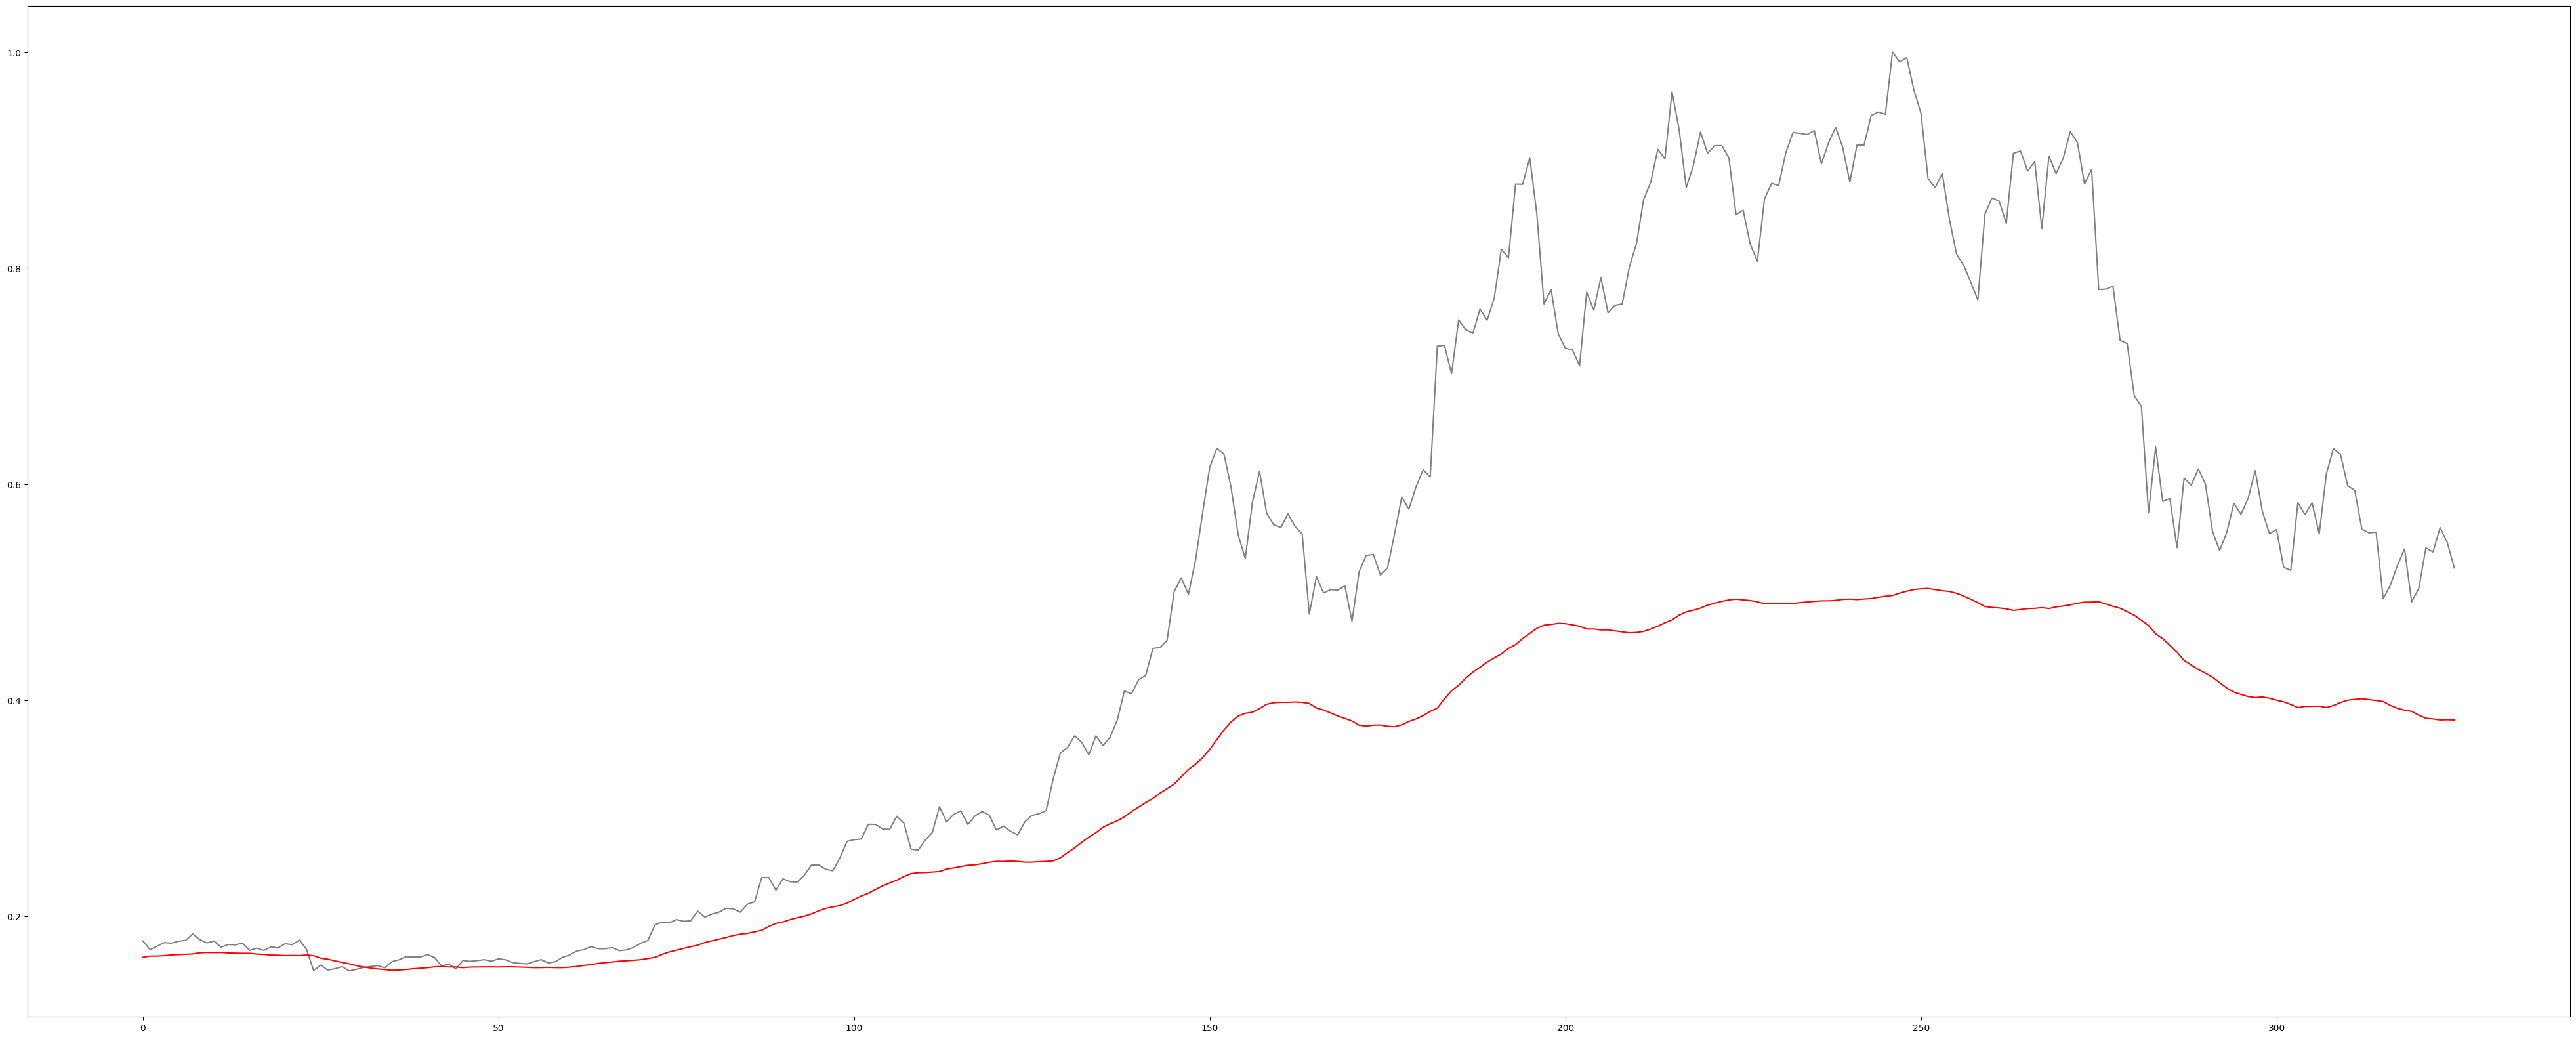

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 20))

plt.plot(y_test, color = 'gray')
plt.plot(y_pred, color = 'red')